In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
"/content/drive/MyDrive/deep/images_001.zip"

'/content/drive/MyDrive/deep/images_001.zip'

In [78]:
"/content/drive/MyDrive/deep/images_002.zip"

'/content/drive/MyDrive/deep/images_002.zip'

In [79]:
import zipfile

# zipファイルのパス
zip_path = "/content/drive/MyDrive/deep/images_001.zip"


# 解凍先のディレクトリを "archive" に指定して解凍
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall("archive")

print("解凍完了")  # 解凍が完了したことを表示


解凍完了


In [80]:
import zipfile

# zipファイルのパス
zip_path_2 = "/content/drive/MyDrive/deep/images_002.zip"


# 解凍先のディレクトリを "archive_002" に指定して解凍
with zipfile.ZipFile(zip_path_2, "r") as zip_ref:
    zip_ref.extractall("archive_002")

print("解凍完了")  # 解凍が完了したことを表示


解凍完了


In [81]:
import os
print(os.listdir("archive")) # List the contents of the extracted directory

['__MACOSX', 'images_001']


In [120]:
import os
print(os.listdir("archive_002")) # List the contents of the extracted directory for images_002.zip

['images_002', '__MACOSX']


In [129]:
import os
print(os.getcwd())

/content


In [130]:
import os

zip_path_2 = '/content/drive/MyDrive/deep/images_002.zip'
print(os.path.exists(zip_path_2))

True


In [122]:
import pandas as pd

csv_path = "/content/drive/MyDrive/deep/Data_Entry_2017.csv"

df = pd.read_csv(csv_path)

df.head

<bound method NDFrame.head of              Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0                58              M            PA                 2682   
1                58              M            PA                 2894   
2                58              M            PA                 2500   
3                81              M            PA                 2500   
4                81              F            PA                 2582   
...             ...            ...           ...                  ...   
112115           39              M            PA                 2048   
112116           29              M            PA                 2048   
112117           42              F            PA                 2048   
112118           30              F            PA                 2048   
112119           27              M            PA                 2048   

        Height]  OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0          2749                        0.143  0.143          NaN  
1          2729                        0.143  0.143          NaN  
2          2048                        0.168  0.168          NaN  
3          2048                        0.171  0.171          NaN  
4          2991                        0.143  0.143          NaN  
...         ...                          ...    ...          ...  
112115     2500                        0.168  0.168          NaN  
112116     2500                        0.168  0.168          NaN  
112117     2500                        0.168  0.168          NaN  
112118     2500                        0.168  0.168          NaN  
112119     2500                        0.171  0.171          NaN  

[112120 rows x 12 columns]>

In [123]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/deep/Data_Entry_2017.csv")

# Massを含むかどうかで癌(1)　or 癌じゃない(0)のラベルを作る
df["Cancer"] = df["Finding Labels"].apply(lambda x: 1 if "Mass" in x else 0)
df_cancer = df[df["Cancer"] == 1]
print(len(df_cancer))  # 何件ある？


5782


In [124]:
import os
import pandas as pd

# 1. 陰性と陽性データを分ける
df_1 = df[df["Cancer"] == 1]
df_0 = df[df["Cancer"] == 0].sample(n=5782, random_state=42)

# 2. 陰陽データを結合（Cancer=0と1をバランスよく）
df_balanced = pd.concat([df_0, df_1])

# 3. 実際に画像が存在する行だけ抽出
valid_rows = []
for idx, row in df_balanced.iterrows():
    filename = row["Image Index"]
    image_path = os.path.join("archive/images_001/images", filename)
    if os.path.exists(image_path):
        valid_rows.append(row)

# 4. 新しいDataFrameにまとめる
df_valid = pd.DataFrame(valid_rows)
print("有効な画像の数:", len(df_valid))


有効な画像の数: 439


In [127]:
!ls /content/archive_002

images_002  __MACOSX


In [133]:
import os
import pandas as pd # Remove the leading whitespace from this line

# Make sure df_balanced is defined before running this cell
# If not, run the previous cells to create df_balanced first.

# 1. 陰性と陽性データを分ける
df_1 = df[df["Cancer"] == 1]
df_0 = df[df["Cancer"] == 0].sample(n=5782, random_state=42)


# Define the image directory path
image_dir_002 = "archive_002/images"

print(f"Checking existence of the image directory: {os.path.exists(image_dir_002)}")

# Take a few sample filenames from df_balanced
sample_filenames = df_balanced["Image Index"].head(10).tolist()

print("\nChecking existence of sample images:")
for filename in sample_filenames:
    # Apply the same extension logic as before
    if filename.endswith(".png"):
        filename = filename[:-4]
    if not filename.endswith(".dcm"):
        filename += ".dcm"

    # Construct the full path
    full_image_path = os.path.join(image_dir_002, filename)

    # Check if the file exists and print the result
    exists = os.path.exists(full_image_path)
    print(f"Checking for {full_image_path}: {exists}")

Checking existence of the image directory: False

Checking existence of sample images:
Checking for archive_002/images/00013670_014.dcm: False
Checking for archive_002/images/00023954_000.dcm: False
Checking for archive_002/images/00019044_000.dcm: False
Checking for archive_002/images/00003028_052.dcm: False
Checking for archive_002/images/00013471_015.dcm: False
Checking for archive_002/images/00015927_001.dcm: False
Checking for archive_002/images/00010531_041.dcm: False
Checking for archive_002/images/00027129_000.dcm: False
Checking for archive_002/images/00000808_002.dcm: False
Checking for archive_002/images/00002556_001.dcm: False


In [161]:
image_dir = "archive_002/all_images"

In [164]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# image_dirを修正して、解凍先のディレクトリ内の画像ディレクトリを指すようにします
# Fix image_dir to point to the image directory within the extraction directory
image_dir = "archive/images_001/images"

images = []
labels = []

for idx, row in tqdm(df_balanced.iterrows(), total=len(df_balanced)):
  filename = row["Image Index"]
  label = row["Cancer"]
  image_path = os.path.join(image_dir, filename)



  if os.path.exists(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128, 128))
    images.append(img)
    labels.append(label)


X = np.array(images)
y = np.array(labels)


print("画像データの形:", len(X))
print("ラベルの形:", len(y))



100%|██████████| 11564/11564 [00:05<00:00, 2253.66it/s]

画像データの形: 439
ラベルの形: 439


In [165]:
print("Xの中身の数:",len(X))
print("ラベルの数:", len(y))

Xの中身の数: 439
ラベルの数: 439


In [168]:
import os
from tqdm import tqdm
import cv2
import numpy as np

# image_dirを修正して、解凍先のディレクトリ内の画像ディレクトリを指すようにします
# Fix image_dir to point to the image directory within the extraction directory
image_dir = "archive/images_002/images"

images = []
labels = []

for idx, row in tqdm(df_balanced.iterrows(), total=len(df_balanced)):
  filename = row["Image Index"]
  label = row["Cancer"]
  image_path = os.path.join(image_dir, filename)



  if os.path.exists(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img,(128, 128))
    images.append(img)
    labels.append(label)


X = np.array(images)
y = np.array(labels)


print("画像データの形:", len(X))
print("ラベルの形:", len(y))



100%|██████████| 11564/11564 [00:00<00:00, 21188.63it/s]

画像データの形: 0
ラベルの形: 0


In [153]:
from sklearn.model_selection import train_test_split

X = X / 255.0

X = X.reshape(-1, 128, 128, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("学習データ数:", len(X_train))
print("テストデータ数:", len(X_test))

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [118]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,345 (14.13 MB)

 Trainable params: 3,705,345 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 525ms/step - accuracy: 0.6217 - loss: 0.6852 - val_accuracy: 0.6364 - val_loss: 0.6654
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 395ms/step - accuracy: 0.6362 - loss: 0.6623 - val_accuracy: 0.6364 - val_loss: 0.6557
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 0.6127 - loss: 0.6727 - val_accuracy: 0.6364 - val_loss: 0.6556
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - accuracy: 0.5982 - loss: 0.6770 - val_accuracy: 0.6364 - val_loss: 0.6566
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 467ms/step - accuracy: 0.6194 - loss: 0.6715 - val_accuracy: 0.6364 - val_loss: 0.6556
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step - accuracy: 0.6036 - loss: 0.6764 - val_accuracy: 0.6364 - val_loss: 0.6747
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 377ms/step - accuracy: 0.6507 - loss: 0.6661 - val_accuracy: 0.6364 - val_loss: 0.6573
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 446ms/step - accuracy: 0.6229 - loss: 0.6666 - val_accuracy: 0.

In [154]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("テスト精度:", test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.6072 - loss: 0.6931
テスト精度: 0.6363636255264282


In [155]:
model.save('my_model.h5')

In [22]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
予測 (0=癌なし, 1=癌): 0
正解ラベル: 0


<ipython-input-156-2887459852>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("予測 (0=癌なし, 1=癌):", int(prediction[0] > 0.5))
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12371 (\N{HIRAGANA LETTER KO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30011 (\N{CJK UNIFIED IDEOGRAPH-753B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gly

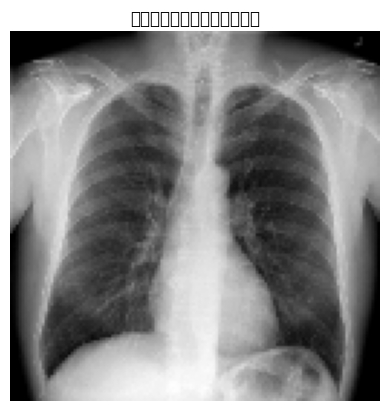

In [156]:
import random
import matplotlib.pyplot as plt

# ランダムに１枚選ぶ
index = random.randint(0, len(X_test) - 1)
sample_image = X_test[index]
sample_label = y_test[index]

# 予測
prediction = model.predict(sample_image.reshape(1, 128, 128, 1))

print("予測 (0=癌なし, 1=癌):", int(prediction[0] > 0.5))
print("正解ラベル:", sample_label)


#画像を表示
plt.imshow(sample_image.reshape(128, 128), cmap='gray')
plt.title("この画像を予測した結果です")
plt.axis('off')
plt.show()

In [157]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [25]:
from tensorflow.keras.models import load_model

model = load_model("cancer_detector_model.h5")

In [158]:
print("予測スコア：", prediction[0])


予測スコア： [0.49995735]


In [159]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (128, 128))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 128, 128, 1)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

KeyboardInterrupt: 

In [160]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測: 癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(32, 128), dtype=float32). Expected shape (None, 128, 128, 1), but input has incompatible shape (32, 128)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 128), dtype=uint8)
  • training=False
  • mask=None

In [ ]:
# モデルを保存する
model.save("cancer_detector_model.h5")


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")


In [ ]:
import cv2
import numpy as np
from google.colab import files # ファイルを読み込む

# ファイルをアップロード
upload = files.upload()

# ファイルがアップロードされたか確認
if not upload:
    print("No file uploaded.")
else:
    file_name = list(upload.keys())[0]

    print(f"Uploaded file: {file_name}")

    # 画像を読み込む
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)


    if img is None:
        print(f"Error loading image: {file_name}. Please check if the file name is correct and the file is not corrupted.")
    else:
        # 画像サイズ変更
        img = cv2.resize(img, (128, 128))

        # 0~1の範囲にする
        img = img / 255.0

        # 形を整える
        img = img.reshape(1, 128, 128, 1)

        print("Image loaded and processed successfully.")
        # You can now use 'img' for prediction or further processing

Saving 癌.jpg to 癌 (1).jpg
Uploaded file: 癌 (1).jpg
Image loaded and processed successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
AIの予測: 癌は見られません(陰性)


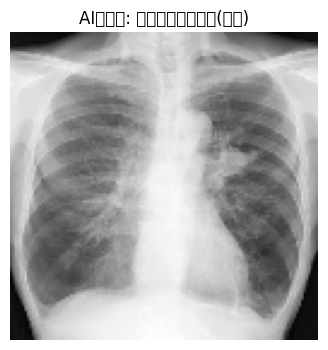

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import load_model
model = load_model("cancer_detector_model.h5")

# 画像予測
prediction = model.predict(img)

# 結果表示
if prediction[0] > 0.5:
  print("AIの予測: 癌の可能性があります(陽性)")
  result = "AIの予測：癌の可能性があります(陽性)"
else:
  print("AIの予測: 癌は見られません(陰性)")
  result = "AIの予測: 癌は見られません(陰性)"



# 画像と結果表示
plt.figure(figsize=(4,4))
plt.imshow(img.reshape(128, 128), cmap="gray")
plt.title(result)
plt.axis("off")
plt.show()

In [ ]:
# モデルを保存する
model.save("cancer_detector_model.h5")
